In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def simulate_scenario(investment, cost_reduction_factor, emission_cut_factor, emission_value=50):
    cost_reduction = investment * cost_reduction_factor
    emission_cut = investment * emission_cut_factor
    net_benefit = (emission_cut * emission_value) - (investment - cost_reduction)
    return net_benefit

In [35]:
def monte_carlo_simulation(investment, n_simulations=1000):
    # we used normal distribution with mean cost reduction of 10% and deviation of 2% 
    cost_reduction_factors = np.random.normal(loc=0.1, scale=0.02, size=n_simulations)
    emission_cut_factors = np.random.normal(loc=0.05, scale=0.01, size=n_simulations)

    # ensure that the values are realistic (between 0% and 100%)
    cost_reduction_factors = np.clip(cost_reduction_factors, 0, 1)
    emission_cut_factors = np.clip(emission_cut_factors, 0, 1)

    net_benefits = []
    for crf, ecf in zip(cost_reduction_factors, emission_cut_factors):
        benefit = simulate_scenario(investment, crf, ecf)
        net_benefits.append(benefit)

    return net_benefits

In [36]:
investment = 100000
results = monte_carlo_simulation(investment)

In [37]:
mean_benefit = np.mean(results)
std_benefit = np.std(results)
prob_loss = np.mean(np.array(results) < 100000) 
prob_gain = np.mean(np.array(results) > 100000)  
print("Risk Metrics:")
print(f"Mean Net Benefit: ${mean_benefit:,.2f}")
print(f"Standard Deviation: ${std_benefit:,.2f}")
print(f"Probability of Loss: {prob_loss*100:.2f}%")
print(f"Probability of Net Benefit > $100,000: {prob_gain*100:.2f}%")


Risk Metrics:
Mean Net Benefit: $161,741.61
Standard Deviation: $50,344.47
Probability of Loss: 10.90%
Probability of Net Benefit > $100,000: 89.10%


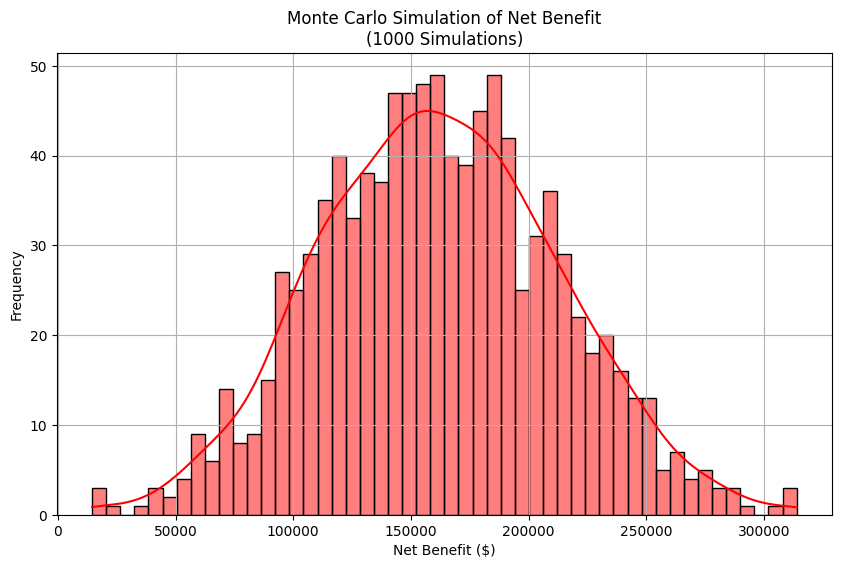

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(results, bins=50, kde=True, color='red', edgecolor='black')
plt.title("Monte Carlo Simulation of Net Benefit\n(1000 Simulations)")
plt.xlabel("Net Benefit ($)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
